In [21]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.layers.core import Dense, Dropout
from keras.models import Sequential

from sklearn.linear_model import LinearRegression

np.random.seed(0)

df = pd.read_csv("default.csv")

df.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [22]:
df = df.dropna()

df = pd.get_dummies(df, drop_first = True)

scaler = MinMaxScaler(feature_range=(0, 1))

data = scaler.fit_transform(df.values)

df_scaled = pd.DataFrame(data, columns=df.columns)

df_scaled.head()

,default,balance,income,student_Yes
0,0.0,0.274845,0.598905,0.0
1,0.0,0.307868,0.155727,1.0
2,0.0,0.404453,0.425862,0.0
3,0.0,0.199392,0.479959,0.0
4,0.0,0.295991,0.517867,0.0


In [23]:
df_scaled['default'].value_counts()

0.0    9667
1.0     333
Name: default, dtype: int64

In [24]:
y = df_scaled["default"]
X = df_scaled[ df_scaled.columns.difference(["default"]) ]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
y_test.value_counts()

0.0    2404
1.0      96
Name: default, dtype: int64

In [ ]:
from sklearn.utils import class_weight

n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(8, input_dim=n_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop')

weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
weights = {index : item for index, item in enumerate(weights) }

history = model.fit(X_train.values, y_train.values,  epochs=30, batch_size=16, verbose=1, validation_split=0, class_weight=weights)

In [48]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test.values)

y_pred = np.round(y_pred).astype(int)

print(classification_report(y_test, y_pred.astype(int)))
print(confusion_matrix(y_test, y_pred.astype(int)))

             precision    recall  f1-score   support

        0.0       0.99      0.90      0.94      2404
        1.0       0.25      0.85      0.39        96

avg / total       0.97      0.90      0.92      2500

[[2160  244]
 [  14   82]]


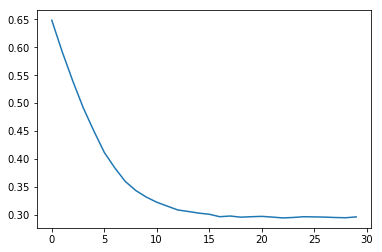

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(history.history['loss'])
fig